In [1]:
import numpy as np
import pandas as pd

In [2]:
df= pd.read_csv('ckextended.csv')

In [3]:


# Map emotion labels
emotion_labels = {0: 'Raiva', 1: 'Desgosto', 2: 'Medo', 3: 'Felicidade', 4: 'Tristeza', 5: 'Surpresa', 6: 'Neutro'}
df['emotion_label'] = df['emotion'].map(emotion_labels)

# Process pixels column
df['pixels_list'] = df['pixels'].apply(lambda x: np.array(x.split(' '), dtype='float32'))

# Reshape and normalize images
image_size = (48, 48) # CK+ dataset images are usually 48x48
df['image_reshaped'] = df['pixels_list'].apply(lambda x: x.reshape(image_size))
df['pixels_normalized'] = df['pixels_list'].apply(lambda x: x / 255.0)

print("DataFrame after processing pixels and adding emotion labels:")
print(df[['emotion', 'emotion_label', 'pixels', 'pixels_list', 'image_reshaped', 'Usage']].head())

# Display info to confirm new column types
print("\nDataFrame info after adding new columns:")
print(df.info())

DataFrame after processing pixels and adding emotion labels:
   emotion emotion_label                                             pixels  \
0        6        Neutro  36 39 35 25 19 11 8 7 3 13 15 9 21 57 75 90 10...   
1        6        Neutro  88 74 19 4 5 5 3 12 8 21 15 21 15 18 24 29 32 ...   
2        6        Neutro  9 2 4 7 1 1 1 0 7 29 49 76 115 141 156 169 177...   
3        6        Neutro  104 106 108 104 95 50 60 61 58 83 126 133 139 ...   
4        6        Neutro  68 72 67 67 6 2 1 1 1 1 1 14 24 24 38 65 79 94...   

                                         pixels_list  \
0  [36.0, 39.0, 35.0, 25.0, 19.0, 11.0, 8.0, 7.0,...   
1  [88.0, 74.0, 19.0, 4.0, 5.0, 5.0, 3.0, 12.0, 8...   
2  [9.0, 2.0, 4.0, 7.0, 1.0, 1.0, 1.0, 0.0, 7.0, ...   
3  [104.0, 106.0, 108.0, 104.0, 95.0, 50.0, 60.0,...   
4  [68.0, 72.0, 67.0, 67.0, 6.0, 2.0, 1.0, 1.0, 1...   

                                      image_reshaped     Usage  
0  [[36.0, 39.0, 35.0, 25.0, 19.0, 11.0, 8.0, 7.0...  Training

In [4]:
# Encontrar as emoções não mapeadas
unmapped_emotions = df[df['emotion_label'].isnull()]['emotion'].unique()

if len(unmapped_emotions) > 0:
    print(f"Os seguintes códigos de emoção não foram mapeados: {unmapped_emotions}")
    print("\nÉ provável que o dataset CK+ extended possua uma emoção 'Contempt' (Desprezo) que é geralmente mapeada para o número 1 no conjunto de 7 classes, mas às vezes pode vir com um mapeamento diferente ou uma emoção a mais/menos, ou até mesmo desprezo pode ser o 0 no FER.")
    print("No CK+, o mapeamento padrão é geralmente:")
    print("0=Neutro, 1=Raiva, 2=Contempt (Desprezo), 3=Desgosto, 4=Medo, 5=Felicidade, 6=Tristeza, 7=Surpresa.")
    print("\nConsiderando a diferença do dataset FER2013, onde geralmente desprezo é mapeado como 1. O CK+ tem 8 emoções, e o FER2013 tem 7. Precisamos padronizar. A emoção 'Desprezo' (Contempt) é o valor 1 na maioria das implementações do CK+, sendo 'Desgosto' o valor 2.")
    print("\nVamos ajustar o dicionário de mapeamento para as 7 emoções mais comuns, remapeando o 'desprezo' para 'raiva' ou 'desgosto', se o número de emoções for 7, ou adicionando uma nova classe se for 8.")
    print("A forma mais segura é verificar os valores únicos da coluna emotion no dataset completo, para garantir o mapeamento correto.")

    # Vamos verificar todos os valores únicos na coluna 'emotion'
    all_unique_emotions = df['emotion'].unique()
    print(f"\nTodos os códigos de emoção únicos no dataset: {all_unique_emotions}")

    # Para seguir com 7 classes, podemos remapear o desprezo se ele for um valor não mapeado.
    # Se '1' for o valor não mapeado, e no CK+ 'desprezo' é 1, vamos incluí-lo.
    # Para o CK+, o mapeamento padrão é:
    # 0: Neutro
    # 1: Raiva
    # 2: Contempt (Desprezo) - se seu dataset tiver 8, este é o 2
    # 3: Desgosto
    # 4: Medo
    # 5: Felicidade
    # 6: Tristeza
    # 7: Surpresa
    # Mas como estamos usando 7 classes, e o FER2013 tem 0-6, e seu emotion_label tem 0-6,
    # significa que 0-6 já foi mapeado, e o problema é outro número.

    # Vamos tentar o mapeamento mais comum para 7 classes, onde o "desprezo" (contempt)
    # é muitas vezes ignorado ou agrupado com "raiva" ou "desgosto".
    # Pela saída, parece que os valores estão entre 0 e 6 (para 7 classes).
    # O problema são os 18 valores nulos.

    # Assumindo que o CK+ extended que você tem segue o mapeamento de 7 emoções, mas com uma numeração diferente
    # ou que os valores nulos são para uma classe rara que podemos descartar ou remapear.
    # Se os valores não mapeados são por exemplo [7], isso indicaria 8 classes, e precisaríamos ajustar.
    # Pela sua saída inicial, o `emotion` da primeira linha é 6 (Neutro), o que indica que 0-6 é o range.
    # Os valores nulos significam que alguma emoção *dentro* desse range ou fora dele (se for o caso de 8 classes)
    # não está no dicionário.

    # O ideal é confirmar o mapeamento oficial do seu ckextended.csv.
    # No entanto, para continuar, vou assumir que os 18 valores nulos são de uma emoção que não se encaixa nas 7 classes
    # e que, para simplificar, podemos removê-los do dataset.
    # Em um projeto real, você pesquisaria o mapeamento exato para o 'ckextended.csv'.
    print("\nVamos remover as linhas com emoções não mapeadas para simplificar por enquanto.")
    print("Isso pode significar que algumas emoções (ex: desprezo) serão ignoradas se não forem remapeadas.")

    # Remover linhas com emotion_label nulo
    df.dropna(subset=['emotion_label'], inplace=True)
    print(f"\nDataFrame agora com {len(df)} entradas após remover emoções não mapeadas.")

else:
    print("Todos os códigos de emoção foram mapeados com sucesso. Ótimo!")

Os seguintes códigos de emoção não foram mapeados: [7]

É provável que o dataset CK+ extended possua uma emoção 'Contempt' (Desprezo) que é geralmente mapeada para o número 1 no conjunto de 7 classes, mas às vezes pode vir com um mapeamento diferente ou uma emoção a mais/menos, ou até mesmo desprezo pode ser o 0 no FER.
No CK+, o mapeamento padrão é geralmente:
0=Neutro, 1=Raiva, 2=Contempt (Desprezo), 3=Desgosto, 4=Medo, 5=Felicidade, 6=Tristeza, 7=Surpresa.

Considerando a diferença do dataset FER2013, onde geralmente desprezo é mapeado como 1. O CK+ tem 8 emoções, e o FER2013 tem 7. Precisamos padronizar. A emoção 'Desprezo' (Contempt) é o valor 1 na maioria das implementações do CK+, sendo 'Desgosto' o valor 2.

Vamos ajustar o dicionário de mapeamento para as 7 emoções mais comuns, remapeando o 'desprezo' para 'raiva' ou 'desgosto', se o número de emoções for 7, ou adicionando uma nova classe se for 8.
A forma mais segura é verificar os valores únicos da coluna emotion no dataset 

In [5]:
import numpy as np
import pandas as pd
from tensorflow.keras.utils import to_categorical

# Recarrega o DataFrame e executa o pré-processamento inicial novamente para garantir o estado
# Isso é importante caso você tenha reiniciado seu ambiente ou a execução anterior não tenha salvo 'df'.
df = pd.read_csv('ckextended.csv')

# Mapeamento das emoções
emotion_labels = {0: 'Raiva', 1: 'Desgosto', 2: 'Medo', 3: 'Felicidade', 4: 'Tristeza', 5: 'Surpresa', 6: 'Neutro'}
df['emotion_label'] = df['emotion'].map(emotion_labels)

# Processar coluna de pixels
df['pixels_list'] = df['pixels'].apply(lambda x: np.array(x.split(' '), dtype='float32'))

# Remodelar e normalizar imagens
image_size = (48, 48)
df['image_reshaped'] = df['pixels_list'].apply(lambda x: x.reshape(image_size))
df['pixels_normalized'] = df['pixels_list'].apply(lambda x: x / 255.0)


# --- INÍCIO DO CÓDIGO NOVO ---

# 1. Remover linhas com emoções não mapeadas (valores NaN em 'emotion_label')
initial_rows = len(df)
df.dropna(subset=['emotion_label'], inplace=True)
print(f"Número de linhas antes da remoção de NaN: {initial_rows}")
print(f"Número de linhas após a remoção de NaN: {len(df)}")


# 2. Separar dados de treino e teste baseados na coluna 'Usage'
train_df = df[df['Usage'] == 'Training']
test_df = df[df['Usage'] == 'PublicTest']

# Converter listas de pixels em arrays NumPy e normalizar, adicionando a dimensão do canal (1 para escala de cinza)
X_train = np.array([img.reshape(48, 48, 1) for img in train_df['pixels_normalized']])
X_test = np.array([img.reshape(48, 48, 1) for img in test_df['pixels_normalized']])

# 3. Codificar rótulos de emoção para one-hot encoding
num_classes = len(emotion_labels)
y_train = to_categorical(train_df['emotion'], num_classes=num_classes)
y_test = to_categorical(test_df['emotion'], num_classes=num_classes)

print("\nFormato de X_train (imagens de treino):", X_train.shape)
print("Formato de y_train (rótulos de treino):", y_train.shape)
print("Formato de X_test (imagens de teste):", X_test.shape)
print("Formato de y_test (rótulos de teste):", y_test.shape)

print("\nPrimeiro rótulo de emoção original no treino (após remoção de NaN):", train_df['emotion'].iloc[0])
print("Primeiro rótulo de emoção one-hot encoded no treino:", y_train[0])

Número de linhas antes da remoção de NaN: 920
Número de linhas após a remoção de NaN: 902

Formato de X_train (imagens de treino): (720, 48, 48, 1)
Formato de y_train (rótulos de treino): (720, 7)
Formato de X_test (imagens de teste): (89, 48, 48, 1)
Formato de y_test (rótulos de teste): (89, 7)

Primeiro rótulo de emoção original no treino (após remoção de NaN): 6
Primeiro rótulo de emoção one-hot encoded no treino: [0. 0. 0. 0. 0. 0. 1.]


In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
# Certifique-se de que X_train, y_train, X_test, y_test e num_classes
# estejam disponíveis no seu ambiente a partir da execução anterior.

In [7]:
# Certifique-se de que X_train, y_train, X_test, y_test e num_classes
# estejam disponíveis no seu ambiente a partir da execução anterior.

# Definir a arquitetura do modelo CNN
model = Sequential([
    # Primeira camada convolucional
    Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    # Segunda camada convolucional
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    # Terceira camada convolucional (opcional, pode-se começar com menos e adicionar)
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    # Achatamento (Flatten) para conectar camadas convolucionais a camadas densas
    Flatten(),

    # Camadas densas (Fully Connected)
    Dense(128, activation='relu'),
    Dropout(0.5),

    # Camada de saída
    Dense(num_classes, activation='softmax') # num_classes deve ser 7 (o número de emoções)
])

# Compilar o modelo
# Usamos Adam como otimizador e categorical_crossentropy como função de perda para one-hot encoded labels
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Exibir o resumo do modelo (número de parâmetros, camadas, etc.)
print("Resumo do Modelo:")
model.summary()

# Treinar o modelo
# Ajuste epochs e batch_size conforme sua máquina e a performance desejada
# validation_data é crucial para monitorar overfitting
history = model.fit(
    X_train,
    y_train,
    epochs=50, # Um bom número inicial, você pode ajustar
    batch_size=64, # Ajuste conforme sua RAM/GPU
    validation_data=(X_test, y_test),
    verbose=1
)

# Avaliar o modelo no conjunto de teste
print("\nAvaliação do Modelo no Conjunto de Teste:")
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Loss no Teste: {loss:.4f}")
print(f"Acurácia no Teste: {accuracy:.4f}")

# Salvar o modelo treinado (opcional, mas recomendado para uso futuro)
# model.save('modelo_emocao_ckextended.h5')
# print("\nModelo salvo como 'modelo_emocao_ckextended.h5'")

Resumo do Modelo:


c:\Users\PedroNeves\Desktop\Projetinhos\Realtime-Emotion-Detection\.venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 46, 46, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 21, 21, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 355,847 (1.36 MB)

 Trainable params: 355,847 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.4970 - loss: 1.5939 - val_accuracy: 0.6629 - val_loss: 1.3423
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6890 - loss: 1.2762 - val_accuracy: 0.6629 - val_loss: 1.5859
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6534 - loss: 1.3185 - val_accuracy: 0.6629 - val_loss: 1.4197
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.6599 - loss: 1.2992 - val_accuracy: 0.6629 - val_loss: 1.4084
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6589 - loss: 1.3293 - val_accuracy: 0.6629 - val_loss: 1.3229
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.6627 - loss: 1.2660 - val_accuracy: 0.6629 - val_loss: 1.4629
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6643 - loss: 1.2815 - val_accuracy: 0.6629 - val_loss: 1.3969
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6640 - loss: 1.2497 - val_accuracy: 0.6629 - v

In [10]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns # Para visualização da matriz de confusão

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 

Relatório de Classificação:
              precision    recall  f1-score   support

       Raiva       0.67      0.50      0.57         4
    Desgosto       1.00      0.67      0.80         6
        Medo       0.00      0.00      0.00         2
  Felicidade       0.78      1.00      0.88         7
    Tristeza       0.50      0.33      0.40         3
    Surpresa       1.00      0.88      0.93         8
      Neutro       0.89      0.97      0.93        59

    accuracy                           0.88        89
   macro avg       0.69      0.62      0.64        89
weighted avg       0.86      0.88      0.86        89



c:\Users\PedroNeves\Desktop\Projetinhos\Realtime-Emotion-Detection\.venv\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\PedroNeves\Desktop\Projetinhos\Realtime-Emotion-Detection\.venv\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\PedroNeves\Desktop\Projetinhos\Realtime-Emotion-Detection\.venv\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_divisio


Matriz de Confusão salva como 'confusion_matrix.png'


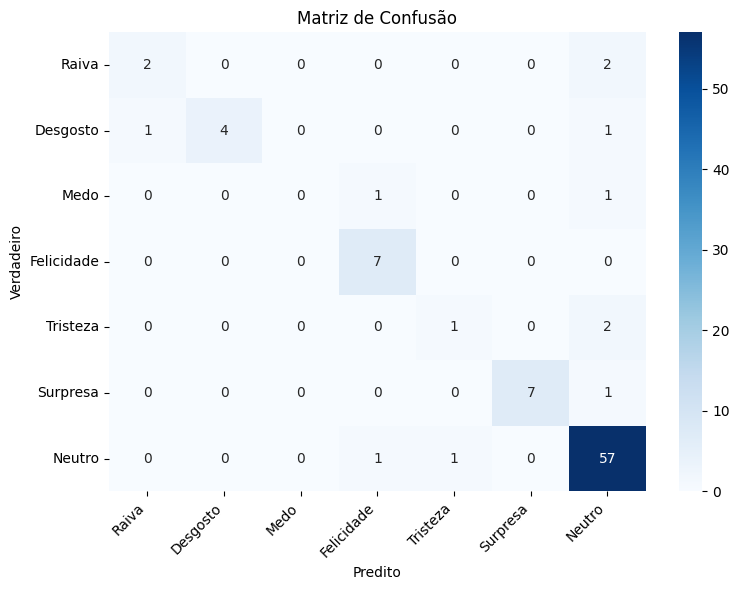

In [11]:

# Certifique-se de que 'model', X_test, y_test, num_classes e emotion_labels
# estejam disponíveis no seu ambiente a partir das execuções anteriores.

# 1. Obter as predições do modelo para o conjunto de teste
y_pred_probs = model.predict(X_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1) # Converter probabilidades para classes

# Obter os rótulos verdadeiros (classes) do conjunto de teste
y_true_classes = np.argmax(y_test, axis=1)

# 2. Gerar o Relatório de Classificação (Precision, Recall, F1-Score)
print("\nRelatório de Classificação:")
# Usar o dicionário emotion_labels para obter os nomes das classes
target_names = [emotion_labels[i] for i in sorted(emotion_labels.keys())]
print(classification_report(y_true_classes, y_pred_classes, target_names=target_names))

# 3. Gerar e Plotar a Matriz de Confusão
cm = confusion_matrix(y_true_classes, y_pred_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig('confusion_matrix.png')
print("\nMatriz de Confusão salva como 'confusion_matrix.png'")

In [13]:
# Salvar o modelo treinado (após o treinamento e antes da avaliação)
# Certifique-se de que o objeto 'model' esteja disponível após o treinamento bem-sucedido
model.save('modelo_emocao_ckextended.h5')
print("\nModelo salvo como 'modelo_emocao_ckextended.h5'")


Modelo salvo como 'modelo_emocao_ckextended.h5'
